In [2]:
! pip install pandas
! pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib 
df = pd.read_csv("crime_dataset_india.csv")
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [4]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [5]:
df["Date Reported"] = pd.to_datetime(df["Date Reported"], errors = "coerce")

In [6]:
df["Year"] = df["Date Reported"].dt.year

In [7]:
filtered_df = df[df["Year"].isin([2023, 2024])]
filtered_df["Year"].value_counts()


Year
2023.0    3450
2024.0    2040
Name: count, dtype: int64

In [8]:
# ipo cleaning panrom, important columns la any missing values iruka nu pakurom 
filtered_df[["City", "Crime Description", "Victim Age", "Victim Gender", "Case Closed", "Weapon Used"]].isnull().sum()


City                   0
Crime Description      0
Victim Age             0
Victim Gender          0
Case Closed            0
Weapon Used          816
dtype: int64

In [12]:
# 1. Drop rows with missing values in essential columns
filtered_df.dropna(subset=["City", "Crime Description", "Victim Gender"], inplace=True)

# 2. Fill missing 'Victim Age' with median age
median_age = filtered_df["Victim Age"].median()
filtered_df["Victim Age"].fillna(median_age, inplace=True)

# 3. Fill missing 'Case Closed' with 'No'
filtered_df["Case Closed"].fillna("No", inplace=True)

# 4. Fill missing 'Weapon Used' with 'Unknown'
filtered_df["Weapon Used"].fillna("Unknown", inplace=True)


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\2810981809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=["City", "Crime Description", "Victim Gender"], inplace=True)
C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\2810981809.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df["Victim Age"].filln

City
Delhi        705
Mumbai       636
Bangalore    449
Hyderabad    398
Kolkata      369
Pune         344
Chennai      323
Ahmedabad    231
Lucknow      196
Jaipur       188
Name: count, dtype: int64


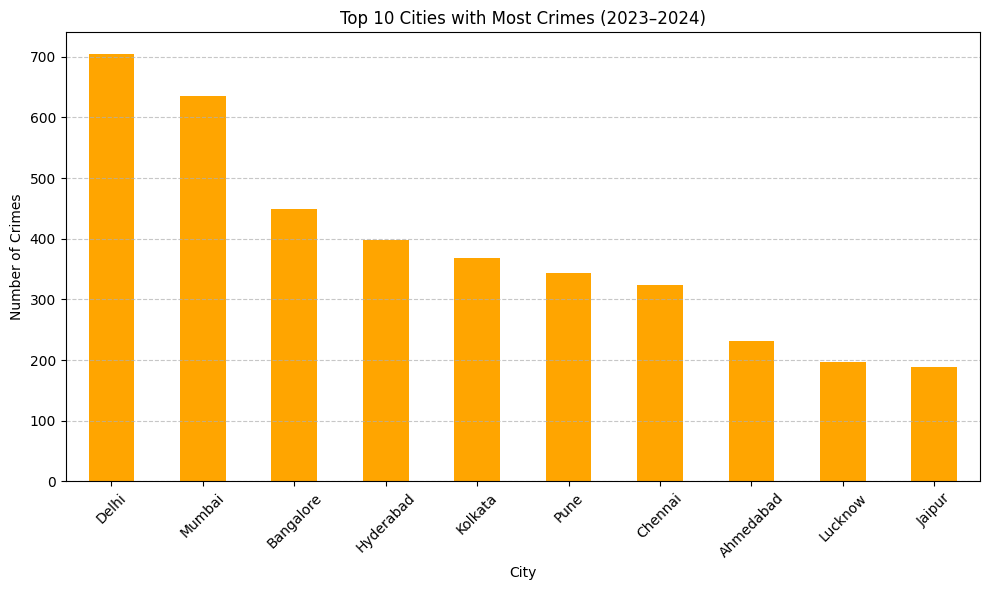

In [13]:
# Count number of crimes by city
top_cities = filtered_df["City"].value_counts().head(10)

# Display it
print(top_cities)

# Optional: Bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_cities.plot(kind="bar", color="orange")
plt.title("Top 10 Cities with Most Crimes (2023–2024)")
plt.xlabel("City")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
# Group by year and crime description
crime_counts = filtered_df.groupby(["Year", "Crime Description"]).size().unstack(fill_value=0)

# Check available year columns (columns after unstacking)
print("Available year columns:", crime_counts.columns)


Available year columns: Index(['ARSON', 'ASSAULT', 'BURGLARY', 'COUNTERFEITING', 'CYBERCRIME',
       'DOMESTIC VIOLENCE', 'DRUG OFFENSE', 'EXTORTION', 'FIREARM OFFENSE',
       'FRAUD', 'HOMICIDE', 'IDENTITY THEFT', 'ILLEGAL POSSESSION',
       'KIDNAPPING', 'PUBLIC INTOXICATION', 'ROBBERY', 'SEXUAL ASSAULT',
       'SHOPLIFTING', 'TRAFFIC VIOLATION', 'VANDALISM', 'VEHICLE - STOLEN'],
      dtype='object', name='Crime Description')


In [19]:
print(crime_counts.columns.tolist())


['ARSON', 'ASSAULT', 'BURGLARY', 'COUNTERFEITING', 'CYBERCRIME', 'DOMESTIC VIOLENCE', 'DRUG OFFENSE', 'EXTORTION', 'FIREARM OFFENSE', 'FRAUD', 'HOMICIDE', 'IDENTITY THEFT', 'ILLEGAL POSSESSION', 'KIDNAPPING', 'PUBLIC INTOXICATION', 'ROBBERY', 'SEXUAL ASSAULT', 'SHOPLIFTING', 'TRAFFIC VIOLATION', 'VANDALISM', 'VEHICLE - STOLEN']


In [20]:
crime_counts = filtered_df.groupby(["Year", "Crime Description"]).size().unstack(fill_value=0)
print(crime_counts.columns.tolist())


['ARSON', 'ASSAULT', 'BURGLARY', 'COUNTERFEITING', 'CYBERCRIME', 'DOMESTIC VIOLENCE', 'DRUG OFFENSE', 'EXTORTION', 'FIREARM OFFENSE', 'FRAUD', 'HOMICIDE', 'IDENTITY THEFT', 'ILLEGAL POSSESSION', 'KIDNAPPING', 'PUBLIC INTOXICATION', 'ROBBERY', 'SEXUAL ASSAULT', 'SHOPLIFTING', 'TRAFFIC VIOLATION', 'VANDALISM', 'VEHICLE - STOLEN']


In [21]:
# Step 1: Group by Crime Description and Year instead (switch order)
crime_counts = filtered_df.groupby(["Crime Description", "Year"]).size().unstack(fill_value=0)

# Step 2: Now check columns (should be years)
print(crime_counts.columns.tolist())


[2023.0, 2024.0]


In [22]:
# Step 2: Create a new column 'Difference' showing increase/decrease from 2023 to 2024
crime_counts["Difference"] = crime_counts[2024.0] - crime_counts[2023.0]

# Step 3: Sort by highest increase
increased_crimes = crime_counts.sort_values("Difference", ascending=False)

# Step 4: Show top 5 increasing crimes
print(increased_crimes.head())


Year                2023.0  2024.0  Difference
Crime Description                             
TRAFFIC VIOLATION      140     104         -36
ROBBERY                138      98         -40
HOMICIDE               138      96         -42
FRAUD                  164     113         -51
ILLEGAL POSSESSION     162     111         -51


In [23]:
# Step: Only crimes that increased
only_increased = increased_crimes[increased_crimes["Difference"] > 0]

# Show top 5 increasing crimes
print(only_increased.head())


Empty DataFrame
Columns: [2023.0, 2024.0, Difference]
Index: []


In [24]:
# Step 1: Check if any missing values in Victim Age & Gender
print(filtered_df[["Victim Age", "Victim Gender"]].isnull().sum())


Victim Age       0
Victim Gender    0
dtype: int64


In [25]:
# Step 2: Create age bins for analysis
bins = [0, 12, 18, 30, 45, 60, 100]
labels = ['Child (0–12)', 'Teen (13–18)', 'Young Adult (19–30)', 'Adult (31–45)', 'Middle Age (46–60)', 'Senior (60+)']

filtered_df['Age Group'] = pd.cut(filtered_df['Victim Age'], bins=bins, labels=labels, right=True)

# Check result
print(filtered_df[['Victim Age', 'Age Group']].head())


       Victim Age            Age Group
26253          60   Middle Age (46–60)
26257          79         Senior (60+)
26262          16         Teen (13–18)
26264          61         Senior (60+)
26265          20  Young Adult (19–30)


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\4195492999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Victim Age'], bins=bins, labels=labels, right=True)


In [26]:
# Step 3: Count crimes based on Age Group and Gender
age_gender_crime = filtered_df.groupby(["Age Group", "Victim Gender"]).size().unstack().fillna(0)

print(age_gender_crime)


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\3425719803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_crime = filtered_df.groupby(["Age Group", "Victim Gender"]).size().unstack().fillna(0)


Victim Gender          F    M    X
Age Group                         
Child (0–12)         145   84    9
Teen (13–18)         267  146   37
Young Adult (19–30)  592  321   80
Adult (31–45)        670  392   82
Middle Age (46–60)   687  413   80
Senior (60+)         857  521  107


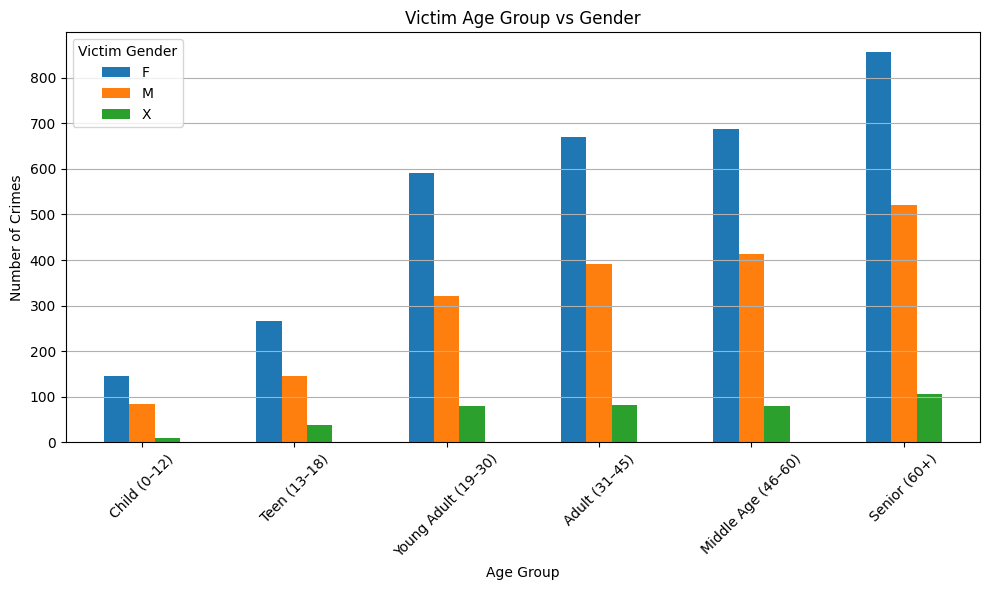

In [27]:
import matplotlib.pyplot as plt

# Step 4: Plot the bar chart
age_gender_crime.plot(kind='bar', figsize=(10, 6), title="Victim Age Group vs Gender", ylabel="Number of Crimes")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [29]:
print(filtered_df.columns)

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed', 'Year',
       'Age Group'],
      dtype='object')


In [31]:
filtered_df["Case Closed"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
# Step 1: Group by Year and Case Closed status
case_status = filtered_df.groupby(["Year", "Case Closed"]).size().unstack(fill_value=0)

# Step 2: Display the table
print(case_status)


Case Closed    No   Yes
Year                   
2023.0       1663  1787
2024.0       1040  1000


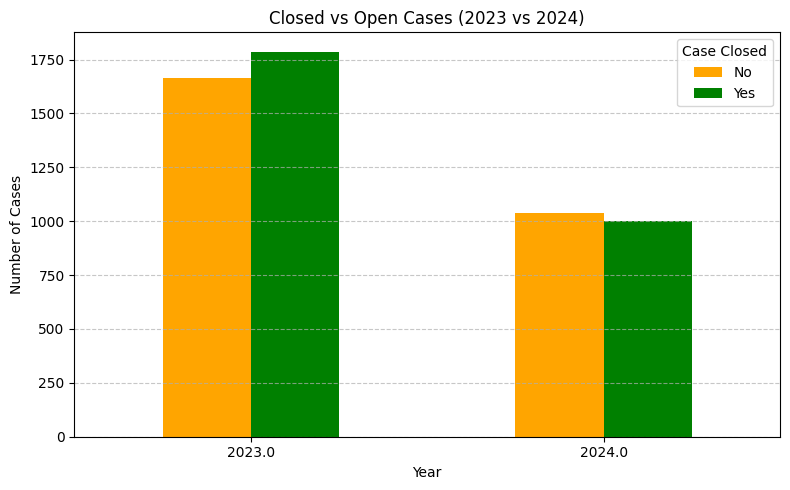

In [34]:
import matplotlib.pyplot as plt

# Step 1: Plot bar chart
case_status.plot(kind="bar", stacked=False, figsize=(8, 5), color=["orange", "green"])

# Step 2: Customize chart
plt.title("Closed vs Open Cases (2023 vs 2024)")
plt.ylabel("Number of Cases")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Case Closed")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Step 3: Show chart
plt.show()


In [35]:
# Convert 'Time of Occurrence' to datetime time format (assuming HH:MM format)
filtered_df['Time of Occurrence'] = pd.to_datetime(filtered_df['Time of Occurrence'], format='%H:%M', errors='coerce').dt.time


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\416838466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time of Occurrence'] = pd.to_datetime(filtered_df['Time of Occurrence'], format='%H:%M', errors='coerce').dt.time


In [36]:
# Function to classify time into ranges
def get_time_period(time):
    if time is None:
        return 'Unknown'
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning (5AM–12PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12PM–5PM)'
    elif 17 <= hour < 21:
        return 'Evening (5PM–9PM)'
    else:
        return 'Night (9PM–5AM)'

# Apply the function
filtered_df['Time Period'] = filtered_df['Time of Occurrence'].apply(get_time_period)


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_7684\987692597.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time Period'] = filtered_df['Time of Occurrence'].apply(get_time_period)


In [37]:
time_counts = filtered_df['Time Period'].value_counts().sort_index()
print(time_counts)


Time Period
Night (9PM–5AM)    5490
Name: count, dtype: int64


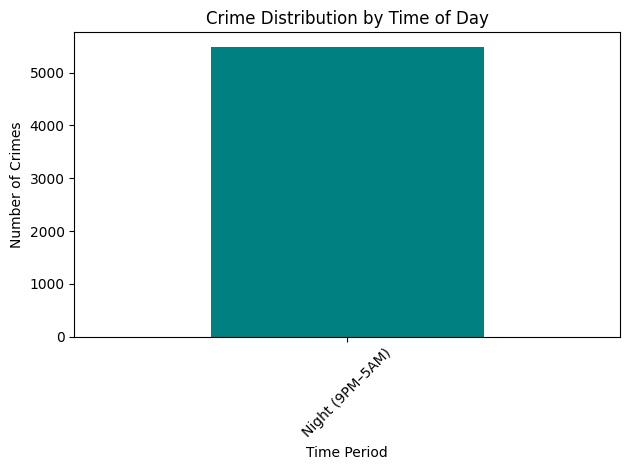

In [38]:
time_counts.plot(kind='bar', color='teal')
plt.title("Crime Distribution by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
def get_time_period(time):
    if time is None:
        return 'Unknown'
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning (5AM–12PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12PM–5PM)'
    elif 17 <= hour < 21:
        return 'Evening (5PM–9PM)'
    else:
        return 'Night (9PM–5AM)'

filtered_df['Time Period'] = filtered_df['Time of Occurrence'].apply(get_time_period)


NameError: name 'filtered_df' is not defined